In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.io.shapereader as shpreader
import numpy as np
import matplotlib

# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/MONAN_DIAG_R_POS_GFS_2024100900_2024100900.mm.x1.40962L55.nc'
original_data = xr.open_dataset(arquivo)
original_data
# Verificar as coordenadas disponíveis
#print("Coordenadas disponíveis:")
#print("Longitudes:", original_data.longitude.values)
#print("Latitudes:", original_data.latitude.values)


<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 24, longitude: 24, level: 27, Time: 1)
Coordinates:
  * latitude             (latitude) float32 96B -14.9 -13.81 ... 8.936 10.02
  * longitude            (longitude) float32 96B -67.16 -66.07 ... -43.32 -42.24
  * level                (level) float32 108B 1e+05 9.75e+04 ... 1.25e+04 1e+04
  * Time                 (Time) datetime64[ns] 8B 2024-10-09
Data variables: (12/72)
    olrtoa               (Time, latitude, longitude) float32 2kB ...
    acswdnb              (Time, latitude, longitude) float32 2kB ...
    acswdnbc             (Time, latitude, longitude) float32 2kB ...
    acswdnt              (Time, latitude, longitude) float32 2kB ...
    acswdntc             (Time, latitude, longitude) float32 2kB ...
    acswupb              (Time, latitude, longitude) float32 2kB ...
    ...                   ...
    q02mt                (Time, latitude, longitude) float32 2kB ...
    u10mt                (Time, latitude, longitude) float32 2kB ...
    v10mt                (Time, latitude, longitude) float32 2kB ...
    acrefl10cm_max       (Time, latitude, longitude) float32 2kB ...
    acrefl10cm_1km       (Time, latitude, longitude) float32 2kB ...
    acrefl10cm_1km_max   (Time, latitude, longitude) float32 2kB ...

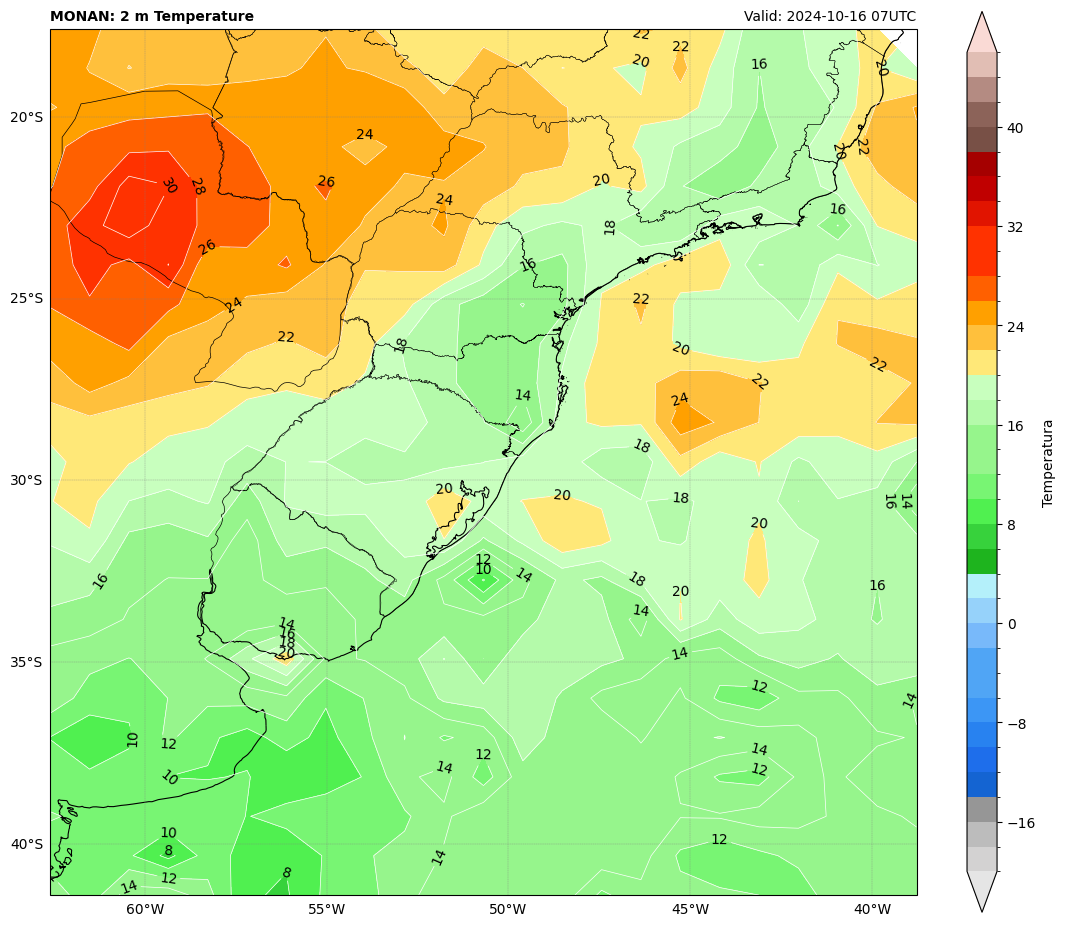

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.io.shapereader as shpreader
import numpy as np
import matplotlib
import cartopy.feature

# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/postprd/MONAN_DIAG_R_POS_GFS_2024101500_2024101607.mm.x1.40962L55.nc'
original_data = xr.open_dataset(arquivo)

# Ajustar os limites de latitude e longitude de acordo com os dados disponíveis
original_data = original_data.sel(latitude=slice(-42, -17), longitude=slice(-63, -38))

# Converter para °C
original_data = original_data - 273.15

# Obter a data
time_var = original_data.Time.values
if np.isscalar(time_var):
    valid = str(time_var)
else:
    valid = str(time_var[0])

valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
# Separar a data com um '-'
#formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}-H{valid[8:10]}"
formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
hora = f"{valid[8:10]}UTC"

# Plotar
plt.figure(figsize=(13, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
img_extent = [original_data.longitude.min(), original_data.longitude.max(), original_data.latitude.min(), original_data.latitude.max()]

# Adicionar o shapefile
shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# Adicionar coastlines, borders e gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Definir intervalos de contorno
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min, data_max, interval)

# Definir cores
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]

cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plotar os contornos
contour1 = original_data.t2m[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap=cmap, extend='both', add_colorbar=False)  # Remover o colorbar automático
contour2 = original_data.t2m[0].plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=levels, colors='white', linewidths=0.5)
ax.clabel(contour2, inline=1, fontsize=10, fmt='%1.0f', colors='black')

# Adicionar a barra de cores manualmente
cbar = plt.colorbar(contour1, ax=ax, orientation='vertical', fraction=0.09, pad=0.05, aspect=30, shrink=0.9)
cbar.set_label('Temperatura')

# Remover o texto na parte superior, exceto o rótulo "Temperatura"
plt.gca().set_title('', loc='center', fontsize=12, pad=20)
plt.gca().set_xlabel('')

# Adicionar o título
plt.title('MONAN: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
#plt.title('Valid: ' + formatted_date + hora, fontsize=10, loc='right')
plt.title('Valid: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

# Salvar a imagem
#plt.savefig('image_7_clean.png')

# Mostrar a imagem
plt.show()



In [ ]:
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.io.shapereader as shpreader
import numpy as np
import matplotlib
import cartopy.feature

# Diretório que contém os arquivos .nc
diretorio = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/postprd/'

# Listar e classificar os arquivos .nc no diretório
arquivos_nc = sorted([f for f in os.listdir(diretorio) if f.endswith('.nc')])

# Loop para acessar cada arquivo .nc no diretório
for nome_arquivo in arquivos_nc:
    arquivo = os.path.join(diretorio, nome_arquivo)
    
    # Abrir o arquivo NetCDF usando xarray
    original_data = xr.open_dataset(arquivo)

    # Ajustar os limites de latitude e longitude de acordo com os dados disponíveis
    original_data = original_data.sel(latitude=slice(-42, -17), longitude=slice(-63, -38))

    # Converter para °C
    original_data = original_data - 273.15

    # Loop sobre o tempo disponível
    for i in range(len(original_data.Time)):
        # Obter a data
        time_var = original_data.Time.values[i]
        valid = str(time_var)
        valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]

        # Separar a data com um '-'
        formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
        hora = f"{valid[8:10]}UTC"

        # Plotar
        plt.figure(figsize=(13, 13))
        ax = plt.axes(projection=ccrs.PlateCarree())
        img_extent = [original_data.longitude.min(), original_data.longitude.max(), original_data.latitude.min(), original_data.latitude.max()]

        # Adicionar o shapefile
        shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
        ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

        # Adicionar coastlines, borders e gridlines
        ax.coastlines(resolution='10m', color='black', linewidth=0.8)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                          xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False

        # Definir intervalos de contorno
        data_min = -20
        data_max = 48 
        interval = 2
        levels = np.arange(data_min, data_max, interval)

        # Definir cores
        colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
                  "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", 
                  "#37d23c", "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", 
                  "#ffe878", "#ffc03c", "#ffa000", "#ff6000", "#ff3200", "#e11400", 
                  "#c00000", "#a50000", "#785046", "#8c6359", "#b48b82", "#e1beb4"]

        cmap = matplotlib.colors.ListedColormap(colors)
        cmap.set_over('#fadad5')
        cmap.set_under('#e5e5e5')

        # Plotar os contornos
        contour1 = original_data.t2m[i].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap=cmap, extend='both', add_colorbar=False)
        contour2 = original_data.t2m[i].plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=levels, colors='white', linewidths=0.5)
        ax.clabel(contour2, inline=1, fontsize=10, fmt='%1.0f', colors='black')

        # Adicionar a barra de cores manualmente
        cbar = plt.colorbar(contour1, ax=ax, orientation='vertical', fraction=0.09, pad=0.05, aspect=30, shrink=0.9)
        cbar.set_label('Temperatura')

        # Remover o texto na parte superior, exceto o rótulo "Temperatura"
        plt.gca().set_title('', loc='center', fontsize=12, pad=20)
        plt.gca().set_xlabel('')

        # Adicionar o título
        #plt.title(f'MONAN: 2 m Temperature - {nome_arquivo}', fontweight='bold', fontsize=10, loc='left')
        #plt.title('Valid: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

        # Adicionar o título
        plt.title('MONAN: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
        #plt.title('Valid: ' + formatted_date + hora, fontsize=10, loc='right')
        plt.title('Valid: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')


        # Salvar a imagem
        plt.savefig(f'temperature_plot_{nome_arquivo}_{formatted_date}_{hora}.png', bbox_inches='tight')

        # Fechar a figura para liberar memória
        plt.close()

print("Figuras salvas com sucesso!")


In [13]:
import os
import imageio
import matplotlib.pyplot as plt

# Defina o diretório onde estão as figuras salvas
diretorio_figuras = '/home/arthursilva/projetos/Scripts/python/MONAN/'  # Substitua pelo caminho real

# Obtenha a lista de todos os arquivos .png no diretório e ordene
arquivos_figuras = sorted([f for f in os.listdir(diretorio_figuras) if f.endswith('.png')])

# Defina o caminho para salvar a animação
caminho_animacao = '/home/arthursilva/projetos/Scripts/python/MONAN/animacao.gif'  # Substitua pelo caminho desejado

# Criar uma lista para armazenar as imagens
imagens = []

# Ler cada imagem e adicionar à lista
for arquivo in arquivos_figuras:
    caminho_arquivo = os.path.join(diretorio_figuras, arquivo)
    imagem = imageio.imread(caminho_arquivo)
    imagens.append(imagem)

# Criar a animação
imageio.mimsave(caminho_animacao, imagens, duration=200)  # A duração pode ser ajustada

print("Animação gerada com sucesso.")


/tmp/ipykernel_34038/4144939769.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagem = imageio.imread(caminho_arquivo)


Animação gerada com sucesso.


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/MONAN_DIAG_R_POS_GFS_2024100900_2024100900.mm.x1.40962L55.nc'
ds = xr.open_dataset(arquivo)




# Escolher a variável que deseja plotar (exemplo: 'prec' para precipitação instantânea)
variable_name = 'prec'
data = ds[variable_name]

# Selecionar o primeiro tempo ou outro ponto no tempo conforme necessário
data_at_time = data.isel(Time=0)  # Exemplo: seleciona o primeiro instante de tempo

# Obter a data (ajustar conforme a estrutura temporal do novo arquivo)
time_var = data.Time.values
if np.isscalar(time_var):
    valid = str(time_var)
else:
    valid = str(time_var[0])

valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
hora = f"{valid[8:10]}UTC"


# Extrair as coordenadas de latitude e longitude
lats = ds['latitude'].values
lons = ds['longitude'].values

# Ajustar as longitudes para o intervalo [-180, 180] se necessário
lons = (lons + 180) % 360 - 180  # Corrige as longitudes para a projeção correta

# Criar uma paleta de cores personalizada
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", 
          "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", 
          "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500", 
          "#c00100", "#a50200", "#870000", "#653b32"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#ffffff')

# Escolher o tamanho do gráfico (largura x altura, em polegadas)
fig, axs = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definir os limites da região de interesse com Santarém no centro
axs.set_extent([-60, -50, -6, 3], ccrs.PlateCarree())  # Santarém fica aproximadamente no centro
#axs.set_extent([-80, -45, -15, 30], ccrs.PlateCarree())

# Adicionar um fundo
axs.add_feature(cfeature.LAND, facecolor='whitesmoke')
axs.add_feature(cfeature.OCEAN, facecolor='white')

# Adicionar um shapefile (se necessário)
shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
axs.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# Adicionar linhas de costa e bordas
axs.coastlines(resolution='10m', color='black', linewidth=0.8)
axs.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

# Definir a grade
gl = axs.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                   xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Definir o intervalo do contorno
data_min = 0.1
data_max = 50
interval = 1
levels = np.arange(data_min, data_max + interval, interval)

# Plotar os contornos
img1 = axs.contourf(lons, lats, data_at_time, cmap=cmap, levels=levels, extend='max')
img2 = axs.contour(lons, lats, data_at_time, colors='white', linewidths=0.3, levels=levels)

# Definir os ticks a serem mostrados
ticks = [0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Adicionar uma barra de cores
plt.colorbar(img1, label='Taxa de Precipitação Instantânea (mm/h)', orientation='vertical', 
             pad=0.02, fraction=0.05, ticks=ticks, ax=axs)

# Adicionar um título
axs.set_title('MONAN - 120 km: Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10, loc='left')
#axs.set_title('Válido: ' + str(ds['Time'].isel(Time=0).values), fontsize=10, loc='right')
axs.set_title('Válido: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

# Mostrar o gráfico
plt.show()
